In [2]:
import tensorflow as tf
from tensorflow import keras

2022-12-11 15:09:26.723396: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # From Tf "Hello World" recommendation

#normalize the data -> representing numbers in memory is to put them on a 0 to 255 scale (8 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


#### Building models for recognizing digits:
As a start implement a linear model  h = Wx - $ \theta\ $ . Initialize W £ R^ 10,784 and $ \theta\ $ £ R ^10  with zeros



In [9]:

# Initialize the weight matrix W ∈ R10×784 to random values
# Initialize the bias vector b ∈ R10 to random values

W = np.zeros((10, 784))
θ = np.zeros((10,1))

# Use the Adam optimizer (TF recommendation)
# Use the accuracy metric (TF recommendation)

# a) Use the softmax operation to normalize the output of the model

model = keras.Sequential([ #sequential ---> multiple layers in it that do different transformations on the data
    keras.layers.Input(x_train.shape[1:]), #input ---> input layer
    keras.layers.Flatten(), #flatten ---> flattens the input
    keras.layers.Dense(10, activation='softmax', input_shape=x_train.shape[1:], use_bias = True, kernel_initializer='zeros', bias_initializer='zeros') #dense ---> fully connected layer
    
])  

# b) Use the categorical cross-entropy loss function
model.compile(
    # c) use a gradient descent algorithm with a constant learning rate η = 0.5.
    optimizer=keras.optimizers.Adam(learning_rate=0.01), #adam ---> tf recommendation for optimizer and this library
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train the model
# d) Process the data in mini-batches. Use one mini-batch for each gradient descent step (one iteration). 
# e) Perform 10,000 iterations for this linear model.
history = model.fit(x_train, y_train, epochs=100, batch_size=600, validation_data = (x_test,y_test),verbose=False)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


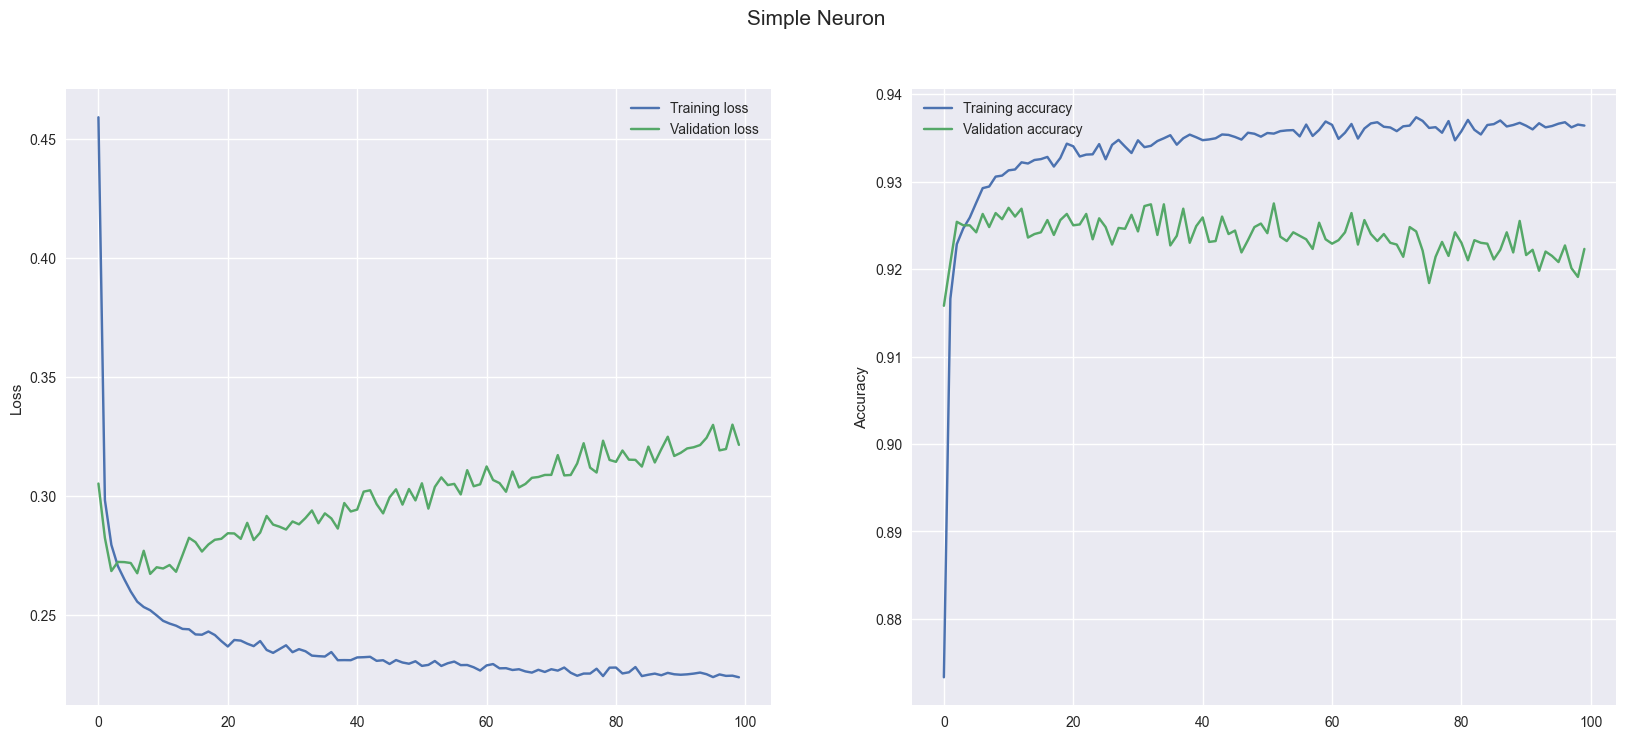

In [10]:
# Plot the results of the model 
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Simple Neuron', fontsize=15)

# Plot the training and validation loss

ax1 = fig.add_subplot(121)

ax1.plot(history.history['loss'], label='Training loss')
ax1.plot(history.history['val_loss'], label='Validation loss')
ax1.set_ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy

ax2 = fig.add_subplot(122)

ax2.plot(history.history['accuracy'], label='Training accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation accuracy')
ax2.set_ylabel('Accuracy')
plt.legend()

plt.show()


2. Implement a second model: A fully connected MLP with 3 hidden layers with 1500 hidden neurons in each hidden layer

In [46]:
#build a LSTM model with 2 LSTM layers with 1500 hidden neurons in each hidden layer
model_mlp = keras.Sequential([
    keras.layers.Input(x_train.shape[1:]),
    keras.layers.Flatten(),
    keras.layers.Dense(1500, activation='relu',  use_bias = -0.1, kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01, seed=None)),
    keras.layers.Dense(1500, activation='relu',  use_bias = -0.1, kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01, seed=None)),
    keras.layers.Dense(1500, activation='relu',  use_bias = -0.1, kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01, seed=None)),
    keras.layers.Dense(10, activation='softmax',  bias_initializer = 'zeros', kernel_initializer = 'zeros')
])

model_mlp.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False, name='Adam'),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model_mlp.summary()


model_mlphistory = model_mlp.fit(x_train, y_train, epochs=100, batch_size=600, validation_data = (x_test,y_test),verbose=False)


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 784)               0         
                                                                 
 dense_110 (Dense)           (None, 1500)              1177500   
                                                                 
 dense_111 (Dense)           (None, 1500)              2251500   
                                                                 
 dense_112 (Dense)           (None, 1500)              2251500   
                                                                 
 dense_113 (Dense)           (None, 10)                15010     
                                                                 
Total params: 5,695,510
Trainable params: 5,695,510
Non-trainable params: 0
_________________________________________________________________


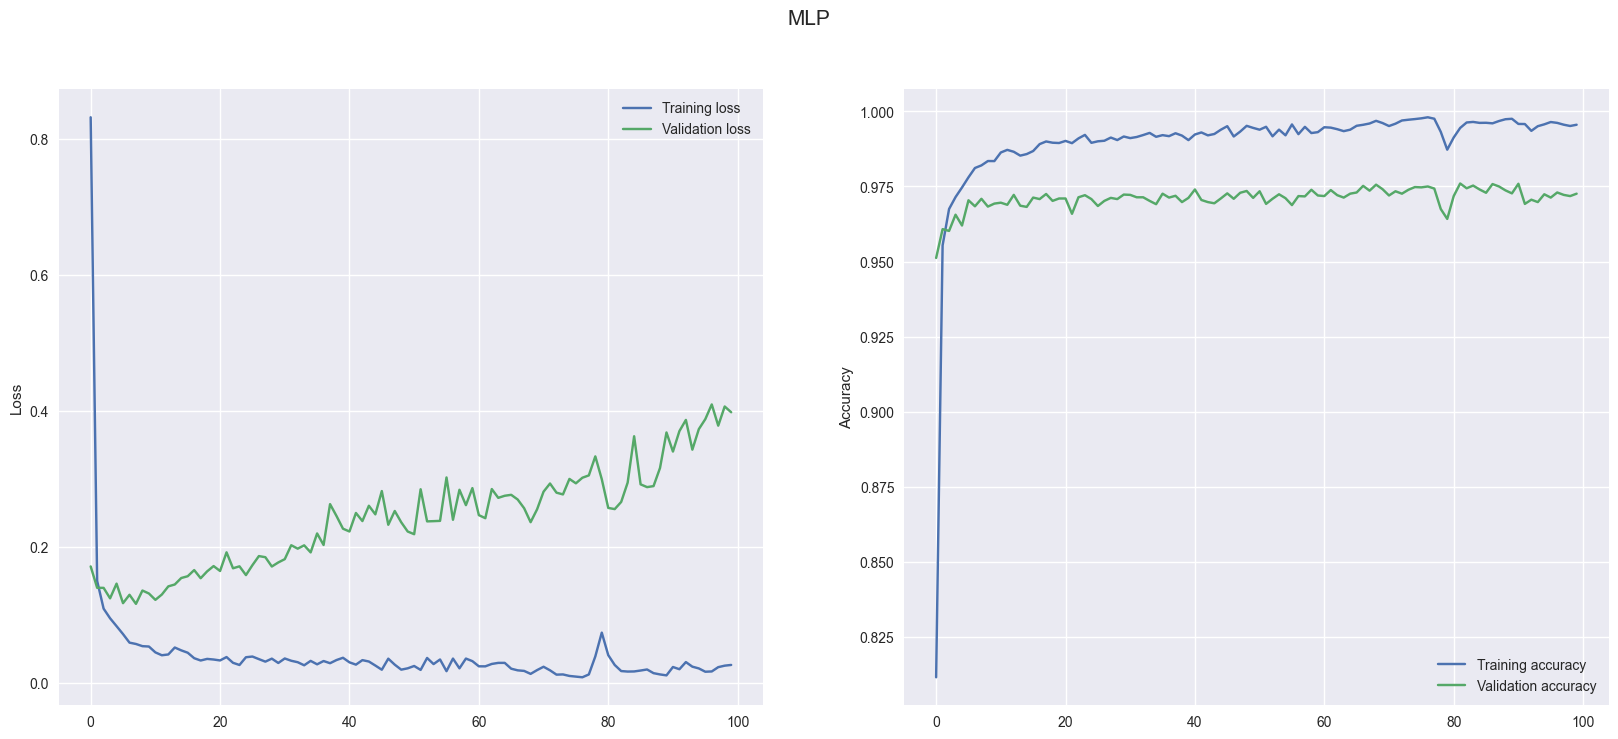

In [47]:
# Plot the results of the model 
fig2 = plt.figure(figsize=(20, 8))
fig2.suptitle('MLP', fontsize=15)

# Plot the training and validation loss

ax1 = fig2.add_subplot(121)

ax1.plot(model_mlphistory.history['loss'], label='Training loss')
ax1.plot(model_mlphistory.history['val_loss'], label='Validation loss')
ax1.set_ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy

ax2 = fig2.add_subplot(122)

ax2.plot(model_mlphistory.history['accuracy'], label='Training accuracy')
ax2.plot(model_mlphistory.history['val_accuracy'], label='Validation accuracy')
ax2.set_ylabel('Accuracy')
plt.legend()

plt.show()


3. For the third model, take the above MLP while adding dropout regularization during training. Apply a dropout rate of 0.5 to each of the hidden layers. Watch out for what happens with dropout when you’re making predictions on the hold-out set.

In [52]:
model_mlp_dropout = keras.Sequential([
    keras.layers.Input(x_train.shape[1:]),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1500, activation='relu',  use_bias = -0.1, kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01, seed=None)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1500, activation='relu',  use_bias = -0.1, kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01, seed=None)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1500, activation='relu',  use_bias = -0.1, kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01, seed=None)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax',  bias_initializer = 'zeros', kernel_initializer = 'zeros')
])

model_mlp_dropout.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False, name='Adam'),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model_mlp_dropout.summary()


model_mlp_dropout_history = model_mlp_dropout.fit(x_train, y_train, epochs=100, batch_size=600, validation_data = (x_test,y_test) ,verbose=False)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_35 (Flatten)        (None, 784)               0         
                                                                 
 dropout_86 (Dropout)        (None, 784)               0         
                                                                 
 dense_122 (Dense)           (None, 1500)              1177500   
                                                                 
 dropout_87 (Dropout)        (None, 1500)              0         
                                                                 
 dense_123 (Dense)           (None, 1500)              2251500   
                                                                 
 dropout_88 (Dropout)        (None, 1500)              0         
                                                                 
 dense_124 (Dense)           (None, 1500)            

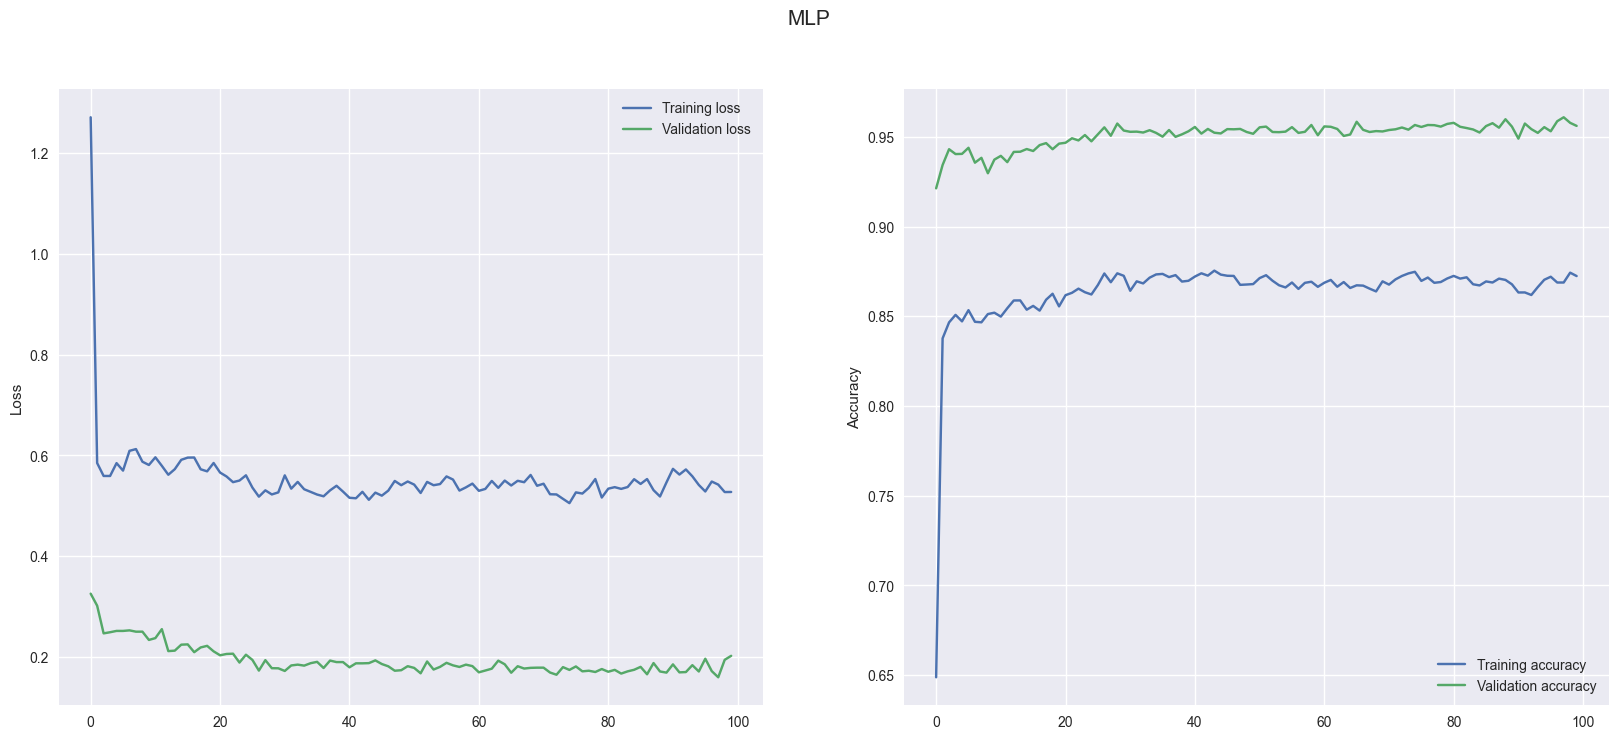

In [53]:
# Plot the results of the model 
fig3 = plt.figure(figsize=(20, 8))
fig3.suptitle('MLP with dropout', fontsize=15)

# Plot the training and validation loss

ax1 = fig3.add_subplot(121)

ax1.plot(model_mlp_dropout_history.history['loss'], label='Training loss')
ax1.plot(model_mlp_dropout_history.history['val_loss'], label='Validation loss')
ax1.set_ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy

ax2 = fig3.add_subplot(122)

ax2.plot(model_mlp_dropout_history.history['accuracy'], label='Training accuracy')
ax2.plot(model_mlp_dropout_history.history['val_accuracy'], label='Validation accuracy')
ax2.set_ylabel('Accuracy')
plt.legend()

plt.show()

4. As a fourth and final model, instead of using fully connected layers combined with dropout regularization, you will use convolutional layers, which are well suited for finding discriminant features for image classification tasks.

In [67]:
# convolutional neural network
model_cnn = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape = (28,28,1) ,padding = 'same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),    
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu', padding = 'same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax', bias_initializer = 'zeros', kernel_initializer = 'zeros')
]) 
 
model_cnn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False, name='Adam'),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_cnn.summary()

model_cnn_history = model_cnn.fit(x_train, y_train, epochs=100, batch_size=600, validation_data = (x_test,y_test) ,verbose=False)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_47 (Flatten)        (None, 3136)              0         
                                                                 
 dense_144 (Dense)           (None, 10)              

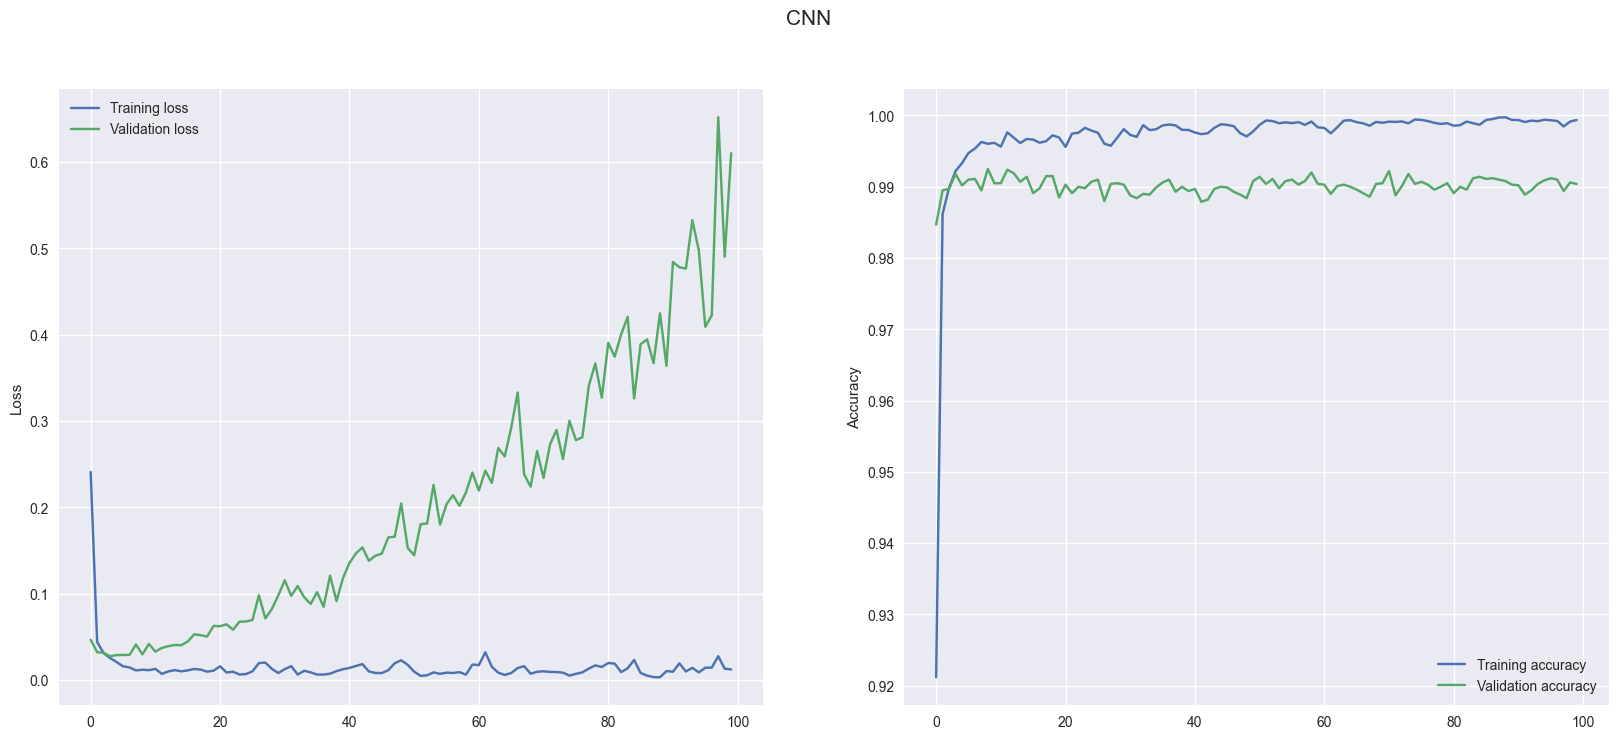

In [69]:
# Plot the results of the model 
fig4 = plt.figure(figsize=(20, 8))
fig4.suptitle('CNN', fontsize=15)

# Plot the training and validation loss

ax1 = fig4.add_subplot(121)

ax1.plot(model_cnn_history.history['loss'], label='Training loss')
ax1.plot(model_cnn_history.history['val_loss'], label='Validation loss')
ax1.set_ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy

ax2 = fig4.add_subplot(122)

ax2.plot(model_cnn_history.history['accuracy'], label='Training accuracy')
ax2.plot(model_cnn_history.history['val_accuracy'], label='Validation accuracy')
ax2.set_ylabel('Accuracy')
plt.legend()

plt.show()

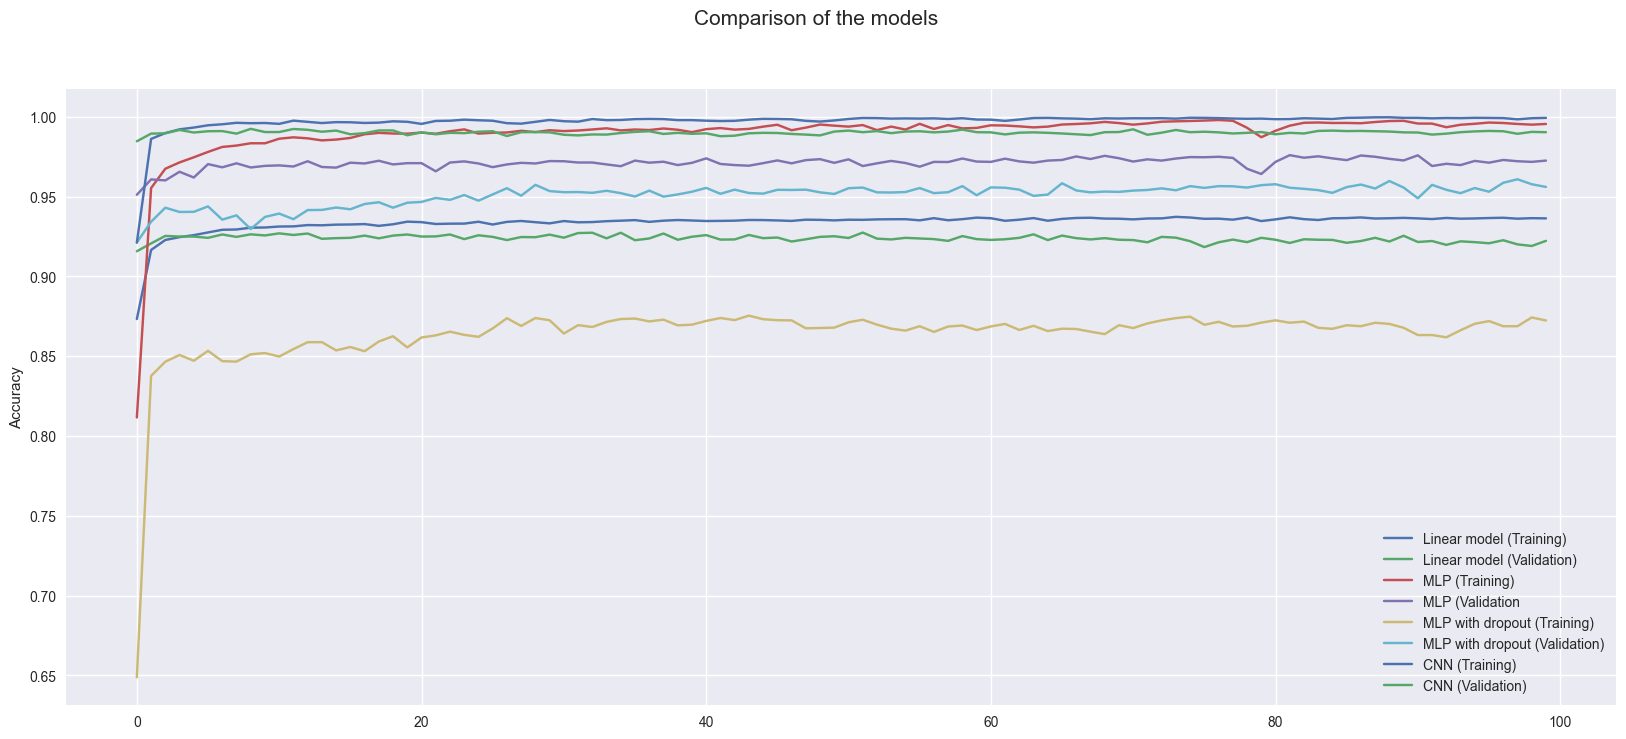

In [78]:
#Plot the models in the same figure
fig5 = plt.figure(figsize=(20, 8))
fig5.suptitle('Comparison of the models', fontsize=15)

# Plot the training and validation loss

ax1 = fig5.add_subplot(111)

ax1.plot(history.history['accuracy'], label='Linear model (Training)')
ax1.plot(history.history['val_accuracy'], label='Linear model (Validation)')
ax1.plot(model_mlphistory.history['accuracy'], label='MLP (Training)')
ax1.plot(model_mlphistory.history['val_accuracy'], label='MLP (Validation')
ax1.plot(model_mlp_dropout_history.history['accuracy'], label='MLP with dropout (Training)')
ax1.plot(model_mlp_dropout_history.history['val_accuracy'], label='MLP with dropout (Validation)')
ax1.plot(model_cnn_history.history['accuracy'], label='CNN (Training)')
ax1.plot(model_cnn_history.history['val_accuracy'], label='CNN (Validation)')
ax1.set_ylabel('Accuracy')
plt.legend()
